In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data_path = r"C:\Users\evana\Google Drive\semester_two\infosys722\assignment\MSAS\MSAS\bank-additional\bank-additional-full.csv";

In [3]:
data=pd.read_csv(input_data_path,sep=";");

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
for i in data.columns:
    if type(data[i][0]) is str:
        print("unknown value count in " + i+":\n" +str(data[data[i]=="unknown"]["y"].count()))
        


unknown value count in job:
330
unknown value count in marital:
80
unknown value count in education:
1731
unknown value count in default:
8597
unknown value count in housing:
990
unknown value count in loan:
990
unknown value count in contact:
0
unknown value count in month:
0
unknown value count in day_of_week:
0
unknown value count in poutcome:
0
unknown value count in y:
0


In [9]:
def fill_unknown(data, bin_attrs, cate_attrs, numeric_attrs):
    # fill_attrs = ["default"]
    fill_attrs = []
    for i in bin_attrs+cate_attrs:
        if data[data[i] == "unknown"]["y"].count() < 2000:
            # delete col containing unknown
            data = data[data[i] != "unknown"] 
        else:
            fill_attrs.append(i)
    
    data = encode_cate_attrs(data, cate_attrs)
    data = encode_bin_attrs(data, bin_attrs)
    data = trans_num_attrs(data, numeric_attrs)
    data["y"] = data["y"].map({"no":0,"yes": 1}).astype(int)
    for i in fill_attrs:     
        test_data = data[data[i] == "unknown"]
        testX = test_data.drop(fill_attrs, axis=1)
        train_data = data[data[i] != "unknown"]        
        trainY = train_data[i]
        trainX = train_data.drop(fill_attrs, axis=1)    
        test_data[i] = train_predict_unknown(trainX, trainY, testX)
        data = pd.concat([train_data, test_data])
    
    return data

In [14]:
data.groupby("age")

In [9]:
dataY=data[data["y"]=="yes"]
dataN=data[data["y"]=="no"]

In [24]:
dataY.groupby("age")["y"].count()

age
17      2
18     12
19     20
20     23
21     29
22     36
23     48
24     86
25     93
26    122
27    114
28    151
29    186
30    202
31    220
32    184
33    210
34    184
35    167
36    154
37    137
38    143
39    114
40     84
41    113
42     91
43     88
44     77
45     92
46     79
     ... 
62     25
63     17
64     27
65     23
66     29
67     11
68     15
69     14
70     19
71     21
72     13
73     13
74     15
75     11
76     18
77     13
78     14
79      7
80     18
81      8
82     11
83      8
84      3
85      7
86      5
87      1
88      9
89      2
92      3
98      2
Name: y, Length: 75, dtype: int64

In [11]:
ages = sorted(data['age'].drop_duplicates())
print(ages)

menMeans = [dataY[dataY["age"]==age]["y"].count() for age in ages]
#print(menMeans)

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
def ShowGroupAndY(fields):
    for field in fields:
        ages = sorted(data[field].drop_duplicates())
#ages=ages[0:10]
        N = len(ages)
        #print(ages)
        AgeN = [(dataN[dataN[field]==age]["y"].count()*100/data[data[field]==age]["y"].count()) for age in ages]
       
        AgeY = [dataY[dataY[field]==age]["y"].count()*100/data[data[field]==age]["y"].count() for age in ages]
        ind = np.arange(N)    # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence
       # AgeFull = [  100 for age in ages]
#print(AgeY)
#print(AgeN)
        p1 = plt.bar(ind, AgeN, width )
        p2 = plt.bar(ind, AgeY, width ,
             bottom=AgeN)

        plt.ylabel('count(*)')
        plt.title('count by group by '+field)
        plt.xticks(ind, ages)
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('No', 'Yes'))
        plt.show()

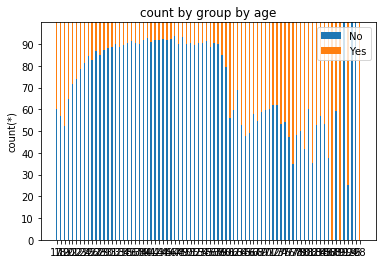

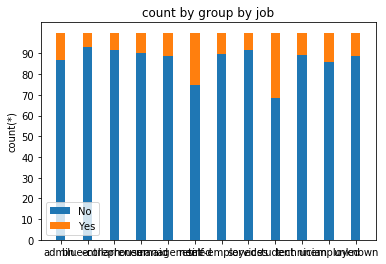

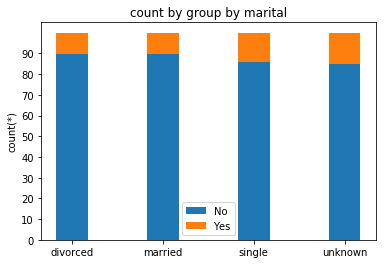

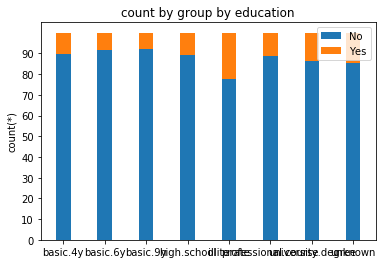

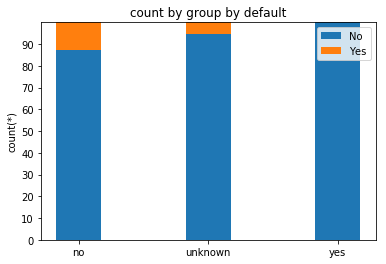

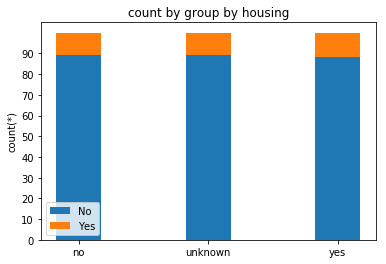

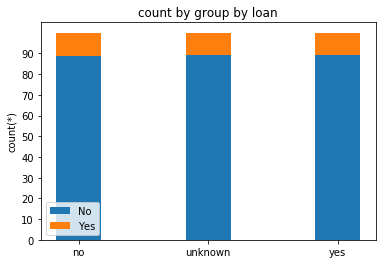

In [44]:
ShowGroupAndY(['age','job','marital','education','default','housing','loan'])

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']


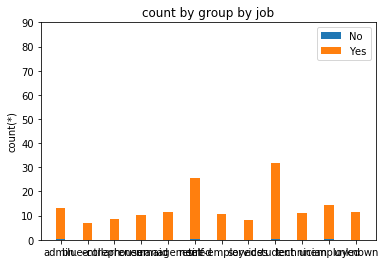

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


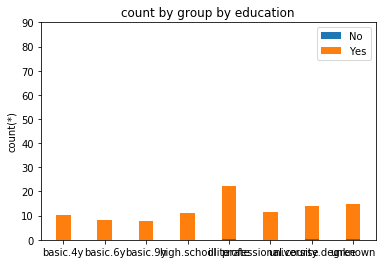

In [39]:
import numpy as np
import matplotlib.pyplot as plt
fields=['job','education']
if 1==1:
    for field in fields:
        ages = sorted(data[field].drop_duplicates())
        print(ages)
#ages=ages[0:10]
        N = len(ages)
        AgeN = [(dataY[dataY[field]==age]["y"].count()/data[data[field]==age]["y"].count()) for age in ages]
       
        AgeY = [dataY[dataY[field]==age]["y"].count()*100/data[data[field]==age]["y"].count() for age in ages]
        ind = np.arange(N)    # the x locations for the groups
        width = 0.35       # the width of the bars: can also be len(x) sequence
       # AgeFull = [  100 for age in ages]
#print(AgeY)
#print(AgeN)
        p1 = plt.bar(ind, AgeN, width )
        p2 = plt.bar(ind, AgeY, width ,
             bottom=AgeN)

        plt.ylabel('count(*)')
        plt.title('count by group by '+field)
        plt.xticks(ind, ages)
        plt.yticks(np.arange(0, 100, 10))
        plt.legend((p1[0], p2[0]), ('No', 'Yes'))
        plt.show() 

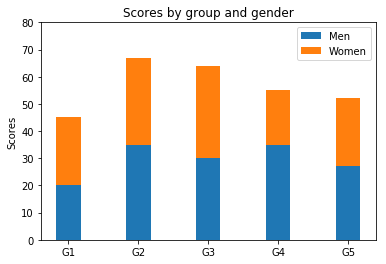

In [73]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = [20, 35, 30, 35, 27]
womenMeans = [25, 32, 34, 20, 25]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width )
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans )

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [37]:
from cycler import cycler

df = pd.read_csv('scorecard.csv')
df = df.ix[0:10]
degList = [i for i in df.columns if i[0:4]=='PCIP']
bar_l = range(df.shape[0])

cm = plt.get_cmap('nipy_spectral')

f, ax = plt.subplots(1, figsize=(10,5))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg], bottom = bottom, label=deg)
    bottom += df[deg].values

ax.set_xticks(bar_l)
ax.set_xticklabels(df['INSTNM'].values, rotation=90, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, fontsize='x-small')
f.subplots_adjust(right=0.75, bottom=0.4)
f.show()

KeyError: 0

[80, 624]
[62, 584]
[137, 1338]
[84, 1077]
[92, 1011]
[69, 394]
[113, 1165]
[86, 377]
[93, 505]
[186, 1267]
[167, 1592]
[64, 620]
[79, 951]
[87, 788]
[114, 1318]
[202, 1512]
[56, 592]
[55, 784]
[184, 1561]
[81, 698]
[58, 518]
[184, 1662]
[143, 1264]
[77, 934]
[91, 1051]
[58, 225]
[68, 665]
[58, 870]
[72, 682]
[97, 882]
[210, 1623]
[220, 1727]
[88, 967]
[154, 1626]
[151, 850]
[114, 737]
[122, 576]
[36, 101]
[48, 178]
[23, 42]
[29, 73]
[32, 41]
[20, 22]
[12, 16]
[19, 28]
[29, 28]
[18, 16]
[11, 15]
[13, 21]
[9, 13]
[0, 1]
[13, 7]
[15, 18]
[11, 13]
[17, 38]
[18, 13]
[25, 37]
[23, 21]
[13, 21]
[11, 6]
[27, 30]
[21, 32]
[14, 20]
[14, 13]
[7, 8]
[7, 7]
[8, 9]
[8, 12]
[15, 17]
[2, 3]
[1, 0]
[0, 2]
[5, 3]
[2, 0]
[0, 1]
[3, 4]
[3, 1]
[2, 0]


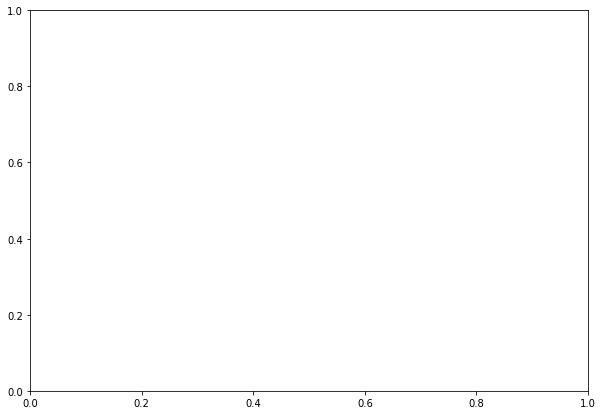

In [53]:
fig, ax = plt.subplots(figsize=(10,7))  

ages = data['age'].drop_duplicates()
margin_bottom = np.zeros(len(data['y'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, age in enumerate(ages):
    values = [dataY[dataY['age']==age]["y"].count(),dataN[dataN['age']==age]["y"].count()]  #list(df[df['age'] == age].loc[:, 'Value'])
    print(values)

    #data[data['age'] == age].plot.bar(x='y',y='Value', ax=ax, stacked=True, 
        #                            bottom = margin_bottom, color=colors[num], label=age)
    #margin_bottom += values

#plt.show()

In [47]:
data.groupby("job").min("age")

TypeError: f() takes 1 positional argument but 2 were given

In [53]:
data.groupby('job').age.agg(['mean','min', 'max','count' ])

,mean,min,max,count
job,,,,
admin.,38.187296,20,72,10422
blue-collar,39.555760,20,80,9254
entrepreneur,41.723214,20,69,1456
housemaid,45.500000,21,85,1060
management,42.362859,21,80,2924
retired,62.027326,23,98,1720
self-employed,39.949331,21,71,1421
services,37.926430,20,69,3969
student,25.894857,17,47,875


In [58]:
def fill_unknown(data, bin_attrs, cate_attrs, numeric_attrs):
    # fill_attrs = ["default"]
    fill_attrs = []
    for i in bin_attrs+cate_attrs:
        if data[data[i] == "unknown"]["y"].count() < 2000:
            # delete col containing unknown
            data = data[data[i] != "unknown"] 
        else:
            fill_attrs.append(i)
     
    data["y"] = data["y"].map({"no":0,"yes": 1}).astype(int)
    for i in fill_attrs:     
        test_data = data[data[i] == "unknown"]
        testX = test_data.drop(fill_attrs, axis=1)
        train_data = data[data[i] != "unknown"]        
        trainY = train_data[i]
        trainX = train_data.drop(fill_attrs, axis=1)    
        test_data[i] = train_predict_unknown(trainX, trainY, testX)
        data = pd.concat([train_data, test_data])
    
    return data

In [56]:
numeric_attrs = ['age','duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed',]
bin_attrs = ['default', 'housing', 'loan']
cate_attrs = ['poutcome', 'education', 'job', 'marital', 
                  'contact', 'month','day_of_week']

In [63]:
data=fill_unknown(data, bin_attrs, cate_attrs, numeric_attrs)

ValueError: could not convert string to float: 'failure'

In [60]:
def train_predict_unknown(trainX, trainY, testX):
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit(trainX, trainY)
    test_predictY = forest.predict(testX).astype(int)
    return pd.DataFrame(test_predictY,index=testX.index)

In [62]:

from sklearn.ensemble import RandomForestClassifier